In [1]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
img = cv2.imread("/content/drive/MyDrive/Images/5/Lena.bmp", 0)

In [20]:
def get_approximation_pyramid_info(image):
  R, C = image.shape
  approximation_pyramid = np.full((R, ((3 * C) // 2) + 1), 255)
  approximation_pyramid[0:R, 0:C] = image.copy()

  current_level = image.copy()
  approximation_levels = [current_level]
  previouse_row = 0

  total_levels = 0
  total_pixels = R * C

  while(True):
    current_level = cv2.pyrDown(current_level)

    current_row, current_col = current_level.shape[0:2]
    approximation_pyramid[previouse_row:previouse_row + current_row, C:C + current_col] = current_level

    approximation_levels.append(current_level)
    previouse_row += current_row

    total_levels += 1
    total_pixels += current_level.shape[0] * current_level.shape[1]

    if current_level.shape[0] == 1 and current_level.shape[1] == 1:
      break

  return approximation_pyramid, approximation_levels, total_levels, total_pixels

In [15]:
def get_prediction_residual_pyramid_info(approximation_levels):
  prediction_residual_levels = [approximation_levels[-1]]

  steps = len(approximation_levels) - 1

  for step in range(steps - 1, -1, -1):
    approximation_row, approximation_col = approximation_levels[step].shape[0:2]
    approximation_expanded = cv2.pyrUp(approximation_levels[step + 1], dstsize=(approximation_row, approximation_col))

    prediction_residual = cv2.subtract(approximation_levels[step], approximation_expanded)
    prediction_residual = prediction_residual * 255.0 // np.max(prediction_residual)
    prediction_residual_levels.append(prediction_residual)

  R, C = prediction_residual_levels[steps].shape
  prediction_residual_pyramid = np.full((R, ((3 * C) // 2) + 1), 255)
  prediction_residual_pyramid[0:R, 0:C] = prediction_residual_levels[steps]
  previouse_row = 0

  total_pixels = R * C

  for step in range(steps - 1, -1, -1):
    current_level = prediction_residual_levels[step]

    current_row, current_col = current_level.shape[0:2]
    prediction_residual_pyramid[previouse_row:previouse_row + current_row, C:C + current_col] = current_level

    previouse_row += current_row

    total_pixels += current_level.shape[0] * current_level.shape[1]

  return prediction_residual_pyramid, total_pixels

Text(0.5, 1.0, 'Pyramid: Approximation')

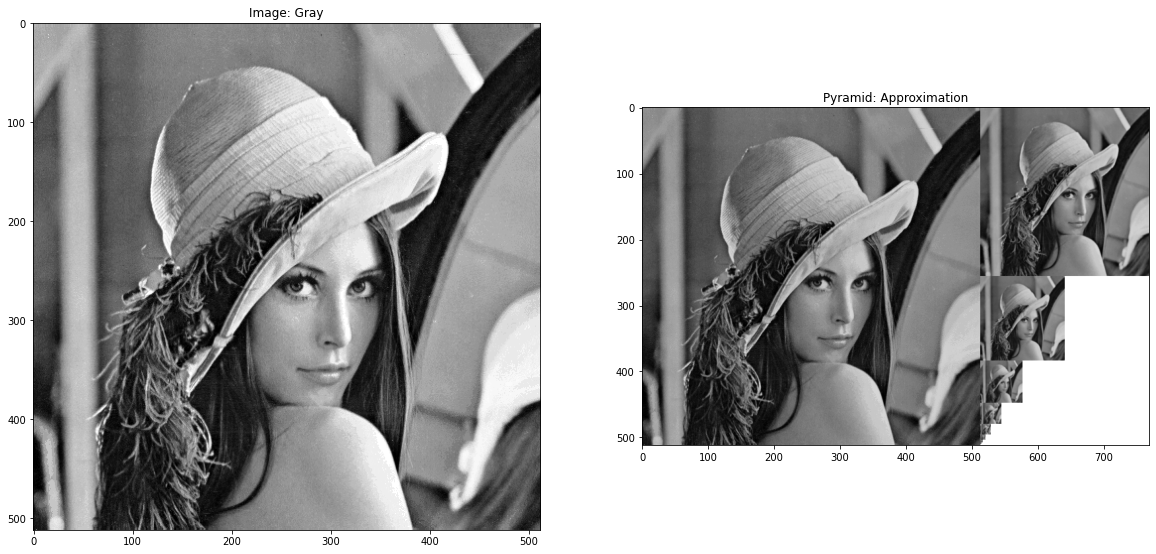

In [21]:
approximation_pyramid, approximation_levels, approximation_total_levels, approximation_total_pixels = get_approximation_pyramid_info(img)

fig, plot = plt.subplots(1, 2, figsize = (20, 10))

plot[0].imshow(img, cmap="gray")
plot[0].set_title("Image: Gray")

plot[1].imshow(approximation_pyramid, cmap="gray")
plot[1].set_title("Pyramid: Approximation")

Text(0.5, 1.0, 'Pyramid: Prediction Residual')

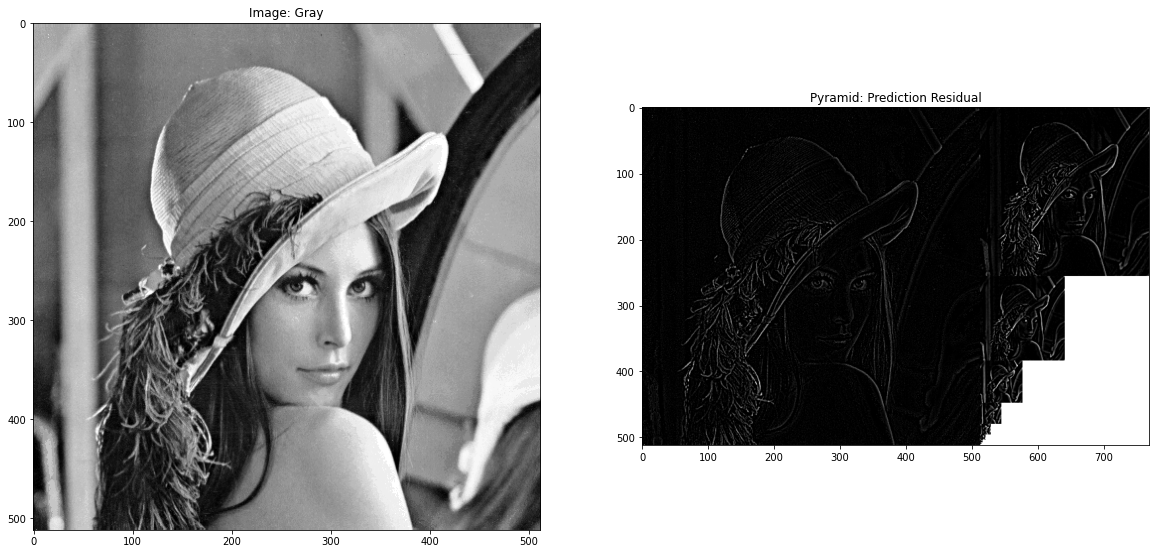

In [27]:
prediction_residual_pyramid, prediction_residual_total_pixels = get_prediction_residual_pyramid_info(approximation_levels)
prediction_residual_total_levels = approximation_total_levels

fig, plot = plt.subplots(1, 2, figsize = (20, 10))

plot[0].imshow(img, cmap="gray")
plot[0].set_title("Image: Gray")

plot[1].imshow(prediction_residual_pyramid, cmap="gray")
plot[1].set_title("Pyramid: Prediction Residual")

In [29]:
print("Approximation Pyramid Info:")
print("Total Levels = ", approximation_total_levels)
print("Total Pixels = ", approximation_total_pixels, "\n")

print("Prediction Residual Pyramid Info:")
print("Total Levels = ", prediction_residual_total_levels)
print("Total Pixels = ", prediction_residual_total_pixels)

Approximation Pyramid Info:
Total Levels =  9
Total Pixels =  349525 

Prediction Residual Pyramid Info:
Total Levels =  9
Total Pixels =  349525
